### Goal- Analyzing the job trends in the market

##Step 1 - EDA of the dataset



This dataset has been collected using the linkedin API and, my own personal login account. The data has been collected over several iteration, over the course of 2 days, with 1 month of gap.

//here attach the ER diagram of the database.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
benefits = pd.read_csv("/content/drive/MyDrive/Analyzing_Job_Market_Trends/benefits.csv")
companies = pd.read_csv("/content/drive/MyDrive/Analyzing_Job_Market_Trends/companies.csv")
companies_industries = pd.read_csv("/content/drive/MyDrive/Analyzing_Job_Market_Trends/company_industries.csv")
companies_specialities = pd.read_csv("/content/drive/MyDrive/Analyzing_Job_Market_Trends/company_specialities.csv")
employee_counts = pd.read_csv("/content/drive/MyDrive/Analyzing_Job_Market_Trends/employee_counts.csv")
job_industries = pd.read_csv("/content/drive/MyDrive/Analyzing_Job_Market_Trends/job_industries.csv")
job_postings = pd.read_csv("/content/drive/MyDrive/Analyzing_Job_Market_Trends/job_postings.csv")
job_skills = pd.read_csv("/content/drive/MyDrive/Analyzing_Job_Market_Trends/job_skills.csv")

In [77]:
job_postings

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15881,3701373516,74718032.0,Sanitation Technician,"Location:\n\nWest Columbia, SC, US, 29172\n\n2...",NaN,NaN,NaN,NaN,Part-time,"West Columbia, SC",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,aspirebakeriescareers.com,0,PART_TIME,NaN,NaN
15882,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN
15883,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,1.700000e+12,NaN,Entry level,NaN,1.690000e+12,recruiting.ultipro.com,0,PART_TIME,NaN,NaN
15884,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,1.700000e+12,NaN,Mid-Senior level,NaN,1.690000e+12,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY


In [ ]:
#EDA on job_postings dataset
#This file contains detailed information about each job posting, including the job title, description, salary, work type, location, and more..

#see the column names
print("Columns:=")
print(job_postings.columns)
print("Head():=")
print(job_postings.head())
print("job_postings description:=")
print(job_postings.describe())

## LinkedIn Job Postings Dataset Overview

### **Columns Overview:**
The dataset consists of 27 columns, each providing valuable information about job postings on LinkedIn. Some key columns include:

- `job_id`: A unique identifier for each job posting.
- `title`: The job title.
- `description`: A detailed description of the job.
- `min_salary`, `med_salary`, `max_salary`: Minimum, median, and maximum salary values.
- `formatted_work_type`: Type of work (e.g., Full-time, Part-time).
- `location`: The location of the job.
- `applies`: The number of applications received.
- `listed_time`: The time when the job was listed.

### **Key Statistics:**
- **Salary:**
  - The average maximum salary is approximately $88,336, with a median of $82,000.
  - Minimum and median salaries have a noticeable range, indicating potential variations in compensation.

- **Applies and Views:**
  - On average, a job receives around 22 applications.
  - The dataset shows an average of 76 views per job posting.

- **Temporal Information:**
  - The dataset spans various time-related columns, including the listed time, expiry, and closed time.

### **Notable Points:**
- **Missing Values:**
  - There are missing values in various columns, such as `company_id`, `formatted_experience_level`, and others.

- **Remote Work:**
  - The `remote_allowed` column indicates whether remote work is allowed (1 for yes, 0 for no).

- **Sponsorship:**
  - About 29% of the job postings are sponsored.

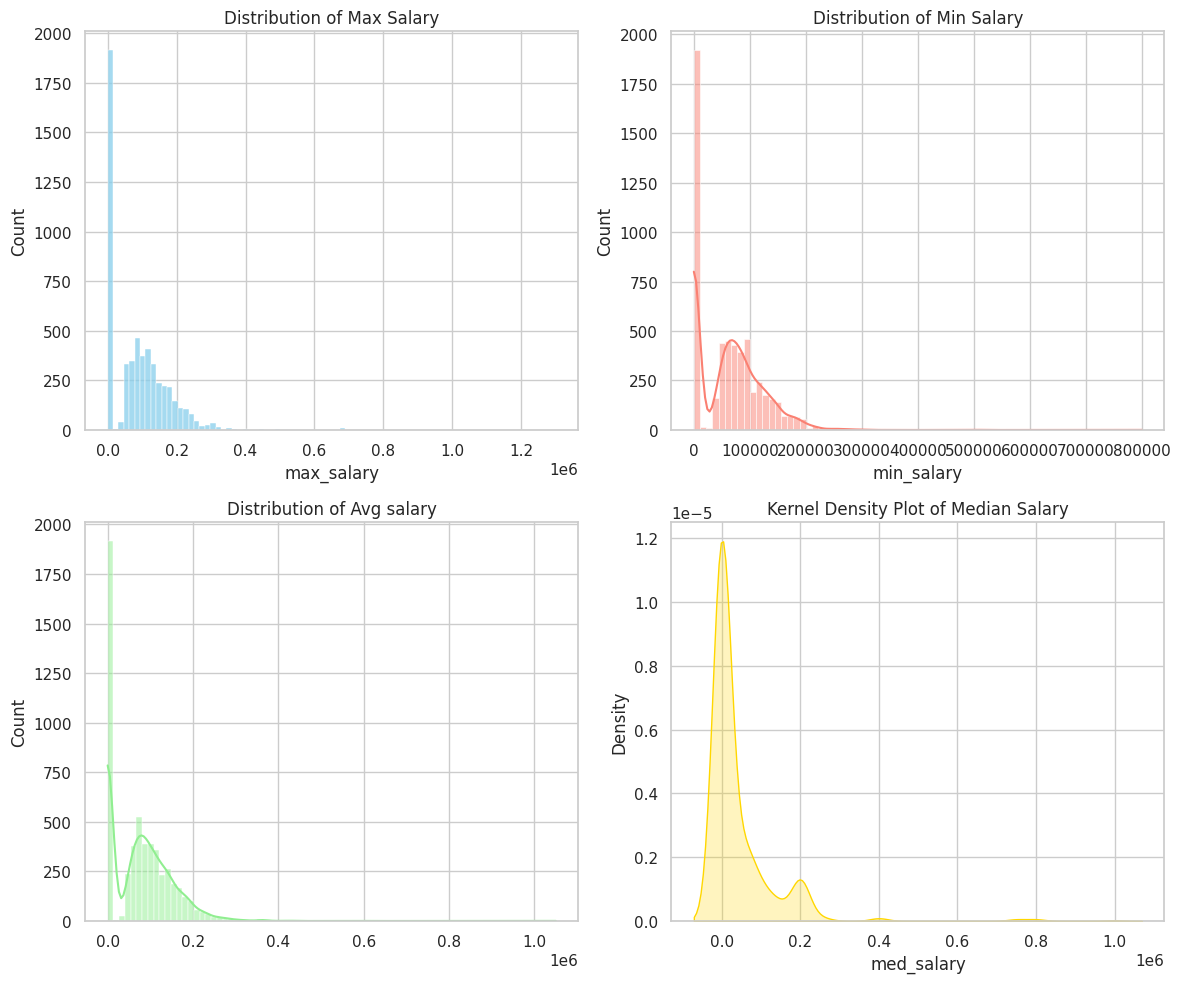

In [ ]:
#after getting familiar with the data, let's do some data visualization of salary first
# Set style for seaborn plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot histograms for max_salary, applies, and views
sns.histplot(job_postings['max_salary'], kde=False, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Max Salary')

sns.histplot(job_postings['min_salary'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of Min Salary')

sns.histplot((job_postings['max_salary']+job_postings['min_salary'])/2, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Distribution of Avg salary')

# Plot kernel density plots for med_salary
sns.kdeplot(job_postings['med_salary'], ax=axes[1, 1], color='gold', fill=True)
axes[1, 1].set_title('Kernel Density Plot of Median Salary')

# Adjust layout
plt.tight_layout()
plt.show()

 ## Conclusion:-
 Since from the histogram of salaries it can be said that wherever, max_salary is missing=> min_salry is also missing,
 - the distribution of these attributes are the same
 -  hence let's clean the data, by removing the rows where the max_salary and min_salary attribute is missing
 - hence after that derive a new attribute from the attributes (max_salary, min_salry, work_type, pay_period) => avg_salary which would be pay on hourly basis

In [ ]:
# Drop rows where both max_salary and min_salary are missing
job_postings_salary = job_postings.dropna(subset=['max_salary', 'min_salary'])

#Size of initial dataset
print("Rows with original dataset:", job_postings.shape[0])
# Check the size of the filtered dataset
print("Rows with salary information:", job_postings_salary.shape[0])

Rows with original dataset: 15886
Rows with salary information: 5521


In [ ]:
jp = job_postings_salary[['job_id','max_salary','min_salary','formatted_work_type','pay_period']]
jp.head()

,job_id,max_salary,min_salary,formatted_work_type,pay_period
0,85008768,52000.0,45760.0,Full-time,YEARLY
5,903408693,42000.0,37000.0,Full-time,YEARLY
8,1029078768,50.0,50.0,Part-time,HOURLY
12,1535492735,20.0,18.0,Part-time,HOURLY
13,1657978824,12000.0,12000.0,Contract,MONTHLY


In [ ]:
job_postings_salary.columns

Index(['job_id', 'company_id', 'title', 'description', 'max_salary',
       'med_salary', 'min_salary', 'pay_period', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'job_posting_url', 'application_url', 'application_type',
       'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type'],
      dtype='object')

In [ ]:
# Assuming work hours per week for full-time, part-time, internship, and contract jobs
hours_per_week_full_time = 40
hours_per_week_part_time = 20
hours_per_week_contract = 30
hours_per_week_internship = 15

# Add 'median_salary_hourly' column
job_postings_salary['average_salary_hourly'] = 0

# Convert pay_period to hours
job_postings_salary['hours'] = 0  # Initialize the 'hours' column

# Convert to hours based on work type
job_postings_salary.loc[job_postings_salary['formatted_work_type'] == 'Full-time', 'hours'] = hours_per_week_full_time
job_postings_salary.loc[job_postings_salary['formatted_work_type'] == 'Part-time', 'hours'] = hours_per_week_part_time
job_postings_salary.loc[job_postings_salary['formatted_work_type'] == 'Internship', 'hours'] = hours_per_week_internship
job_postings_salary.loc[job_postings_salary['formatted_work_type'] == 'Contract', 'hours'] = hours_per_week_contract

# For hourly pay period, keep the 'hours' column as is
job_postings_salary.loc[job_postings_salary['pay_period'] == 'HOURLY', 'hours'] = 1

# Convert to hours based on pay period (MONTHLY and YEARLY)
job_postings_salary.loc[job_postings_salary['pay_period'] == 'MONTHLY', 'hours'] *= 4  # Convert monthly to weekly
job_postings_salary.loc[job_postings_salary['pay_period'] == 'YEARLY', 'hours'] *= (10*4)  # Convert yearly to weekly

# Calculate median_salary_hourly
job_postings_salary['average_salary_hourly'] = (job_postings_salary['min_salary'] + job_postings_salary['max_salary']) / 2 / job_postings_salary['hours']

# Display the updated DataFrame
print(job_postings_salary[['job_id', 'max_salary', 'min_salary', 'formatted_work_type', 'pay_period', 'average_salary_hourly']])


           job_id  max_salary  min_salary formatted_work_type pay_period  \
0        85008768    52000.00    45760.00           Full-time     YEARLY   
5       903408693    42000.00    37000.00           Full-time     YEARLY   
8      1029078768       50.00       50.00           Part-time     HOURLY   
12     1535492735       20.00       18.00           Part-time     HOURLY   
13     1657978824    12000.00    12000.00            Contract    MONTHLY   
...           ...         ...         ...                 ...        ...   
15870  3701373383    85000.00    75000.00           Full-time     YEARLY   
15871  3701373385    70000.00    60000.00           Full-time     YEARLY   
15875  3701373427       23.89       19.08          Internship     HOURLY   
15878  3701373493   105200.00    91900.00           Full-time     YEARLY   
15884  3701373524   135000.00   110000.00           Full-time     YEARLY   

       average_salary_hourly  
0                   30.55000  
5                   24.68

<ipython-input-30-3d84a173af68>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_postings_salary['average_salary_hourly'] = 0
<ipython-input-30-3d84a173af68>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_postings_salary['hours'] = 0  # Initialize the 'hours' column
<ipython-input-30-3d84a173af68>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

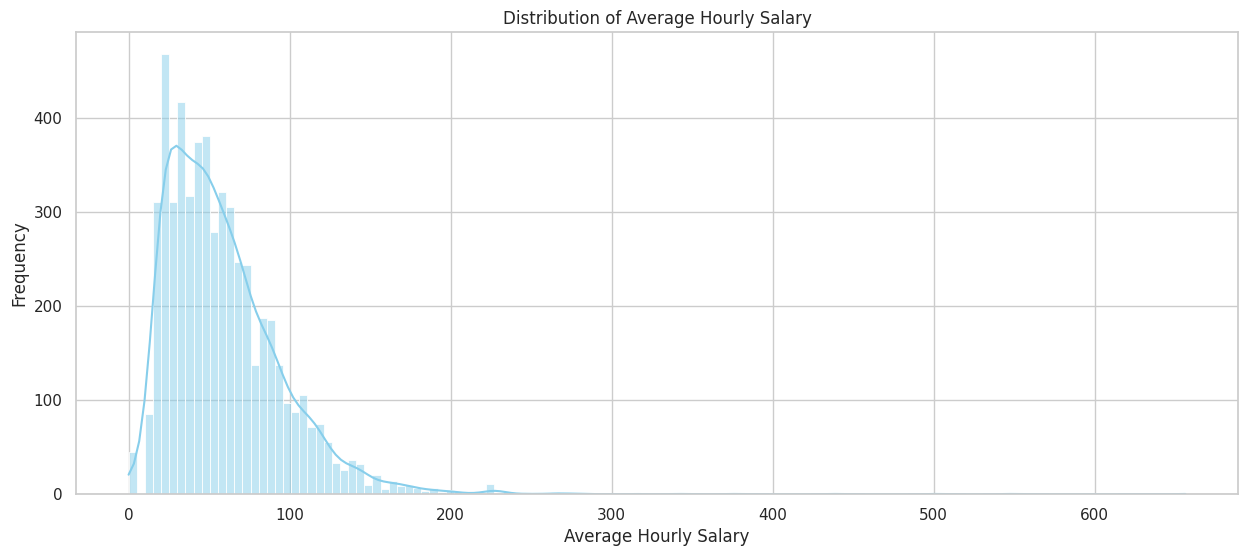

In [ ]:
#Plotting the hourly salary
# Set style for seaborn plots
sns.set(style="whitegrid")

# Create a histogram for median_salary_hourly
plt.figure(figsize=(15, 6))
sns.histplot(job_postings_salary['average_salary_hourly'], kde=True, color='skyblue')
plt.title('Distribution of Average Hourly Salary')
plt.xlabel('Average Hourly Salary')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# now after getting the cleaned data with salary let's do some inferential statistics
# Identify unique values and counts for nominal data members
nominal_columns = ['formatted_work_type', 'pay_period', 'work_type', 'currency', 'compensation_type']

for column in nominal_columns:
    unique_values = job_postings_salary[column].unique()
    value_counts = job_postings_salary[column].value_counts()

    print(f"Unique values for '{column}':")
    print(unique_values)

    print(f"\nValue counts for '{column}':")
    print(value_counts)

    print("\n" + "-"*50 + "\n")

# Identify important data members for inferential statistics
important_data_members = ['max_salary', 'min_salary', 'applies', 'views', 'average_salary_hourly']

print("Important data members for inferential statistics:")
print(important_data_members)



Unique values for 'formatted_work_type':
['Full-time' 'Part-time' 'Contract' 'Internship' 'Temporary' 'Other']

Value counts for 'formatted_work_type':
Full-time     4619
Contract       634
Part-time      187
Temporary       36
Internship      26
Other           19
Name: formatted_work_type, dtype: int64

--------------------------------------------------

Unique values for 'pay_period':
['YEARLY' 'HOURLY' 'MONTHLY']

Value counts for 'pay_period':
YEARLY     3649
HOURLY     1807
MONTHLY      65
Name: pay_period, dtype: int64

--------------------------------------------------

Unique values for 'work_type':
['FULL_TIME' 'PART_TIME' 'CONTRACT' 'INTERNSHIP' 'TEMPORARY' 'OTHER']

Value counts for 'work_type':
FULL_TIME     4619
CONTRACT       634
PART_TIME      187
TEMPORARY       36
INTERNSHIP      26
OTHER           19
Name: work_type, dtype: int64

--------------------------------------------------

Unique values for 'currency':
['USD']

Value counts for 'currency':
USD    5521
Name: 

In [ ]:
#normality test for median_salary_hourly
from scipy.stats import shapiro

# Example code for normality test
stat, p_value = shapiro(job_postings_salary['average_salary_hourly'])

# Check the results
alpha = 0.05
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

# average_salary_hourly is normally distributed

The data appears to be normally distributed (fail to reject H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Since we have tested median_hourly_salary for normal distribution, hence
lets remove rows having null values in "views"/"applies" attributes `Data Preprocessing`

Here's a step-by-step guide on how I might proceed:

1. **Remove NaN and Inf Values:**
   - Clean the dataset by removing rows with NaN or Inf values in the relevant columns (views and median_salary_hourly).

2. **Remove Outliers:**
   - Identify and remove outliers from the dataset. Outliers can significantly influence correlation coefficients.I will use IQR method for this

3. **Standardize Data:**
   - Standardize the views and median_salary_hourly columns. Standardization involves transforming data to have a mean of 0 and a standard deviation of 1. This step ensures that both variables are on the same scale.

4. **Correlation Test:**
   - After standardizing the data,I will perform the Pearson correlation test between the standardized views and standardized median_salary_hourly. This will give you a more accurate representation of the linear relationship between the two variables.

5. **Interpret Correlation Coefficient:**
   - Interpret the correlation coefficient to understand the strength and direction of the relationship.


In [ ]:
from scipy.stats import iqr, pearsonr

# Step 1: Remove NaN and Inf values
cleaned_data = job_postings_salary[['views', 'average_salary_hourly']].replace([np.inf, -np.inf], np.nan).dropna()

# Step 2: Remove Outliers (Example using IQR)
Q1 = cleaned_data.quantile(0.25)
Q3 = cleaned_data.quantile(0.75)
IQR_values = Q3 - Q1
filtered_data = cleaned_data[~((cleaned_data < (Q1 - 1.5 * IQR_values)) | (cleaned_data > (Q3 + 1.5 * IQR_values))).any(axis=1)]

# Step 3: Standardize Data
standardized_data = (filtered_data - filtered_data.mean()) / filtered_data.std()

# Step 4: Correlation Test
correlation_coefficient, p_value = pearsonr(standardized_data['views'], standardized_data['average_salary_hourly'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

#Interactive message
if abs(correlation_coefficient) < 0.2:
    print("The correlation is very weak.")
elif 0.2 <= abs(correlation_coefficient) < 0.5:
    print("The correlation is weak to moderate.")
elif 0.5 <= abs(correlation_coefficient) < 0.8:
    print("The correlation is moderate to strong.")
else:
    print("The correlation is very strong.")

# Additional check for statistical significance (using conventional alpha level 0.05)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")



Pearson Correlation Coefficient: 0.2204
P-value: 0.0000
The correlation is weak to moderate.
The correlation is statistically significant.


Hence we can say there is a significant correlation between work-pay and number of people applying for that work-position, now let's delve further, and see if this trend is same on for different work-type ( full-time, part-time, contract, internships)

Since work_type is nominal and average_hourly_pay is numerical with normal distribution, let's do ANOVA to test the hypotheses whether Work_Type and No of views are related or not

# Job Skills
job_id = random rnumber unique to each job listing,
skill_abr = abbreviation which shows in which sector the job lisitng belongs to

full forms for the skills from the dataset:

1. **ACCT:** Accounting
2. **FIN:** Finance
3. **MGMT:** Management
4. **MNFC:** Manufacturing
5. **HCPR:** Healthcare and Pharmaceuticals
6. **ENG:** Engineering
7. **IT:** Information Technology
8. **ADM:** Administration
9. **SALE:** Sales
10. **DSGN:** Design
11. **ART:** Artistic skills
12. **EDU:** Education
13. **TRNG:** Training
14. **BD:** Business Development
15. **PRJM:** Project Management
16. **CNSL:** Consulting
17. **STRA:** Strategic Planning
18. **OTHR:** Other (miscellaneous skills)
19. **RSCH:** Research
20. **GENB:** General Business
21. **MRKT:** Marketing
22. **LGL:** Legal
23. **CUST:** Customer Service
24. **QA:** Quality Assurance
25. **PROD:** Production
26. **ANLS:** Analysis
27. **PR:** Public Relations
28. **WRT:** Writing
29. **SUPL:** Supply Chain Management
30. **HR:** Human Resources
31. **PRDM:** Product Management
32. **ADVR:** Advertising
33. **PRCH:** Purchasing
34. **DIST:** Distribution
35. **SCI:** Science

['ACCT', 'FIN', 'MGMT', 'MNFC', 'HCPR', 'ENG', 'IT', 'ADM', 'SALE', 'DSGN', 'ART', 'EDU', 'TRNG', 'BD', 'PRJM', 'CNSL', 'STRA', 'OTHR', 'RSCH', 'GENB', 'MRKT', 'LGL', 'CUST', 'QA', 'PROD', 'ANLS', 'PR', 'WRT', 'SUPL', 'HR', 'PRDM', 'ADVR', 'PRCH', 'DIST', 'SCI']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'ACCT'),
  Text(1, 0, 'ADM'),
  Text(2, 0, 'ADVR'),
  Text(3, 0, 'ANLS'),
  Text(4, 0, 'ART'),
  Text(5, 0, 'BD'),
  Text(6, 0, 'CNSL'),
  Text(7, 0, 'CUST'),
  Text(8, 0, 'DIST'),
  Text(9, 0, 'DSGN'),
  Text(10, 0, 'EDU'),
  Text(11, 0, 'ENG'),
  Text(12, 0, 'FIN'),
  Text(13, 0, 'GENB'),
  Text(14, 0, 'HCPR'),
  Text(15, 0, 'HR'),
  Text(16, 0, 'IT'),
  Text(17, 0, 'LGL'),
  Text(18, 0, 'MGMT'),
  Text(19, 0, 'MNFC'),
  Text(20, 0, 'MRKT'),
  Text(21, 0, 'OTHR'),
  Text(22, 0, 'PR'),
  Text(23, 0, 'PRCH'),
  Text(24, 0, 'PRDM'),
  Text(25, 0, 'PRJM'),
  Text(26, 0, 'PROD'),
  Text(27, 0, 'QA'),
  Text(28, 0, 'RSCH'),
  Text(29, 0, 'SALE'),
  Text(30, 0, 'SCI'),
  Text(31, 0, 'STRA'),
  Text(32, 0, 'SUPL'),
  Text(33, 0, 'TRNG'),
  Text(34, 0, 'WRT')])

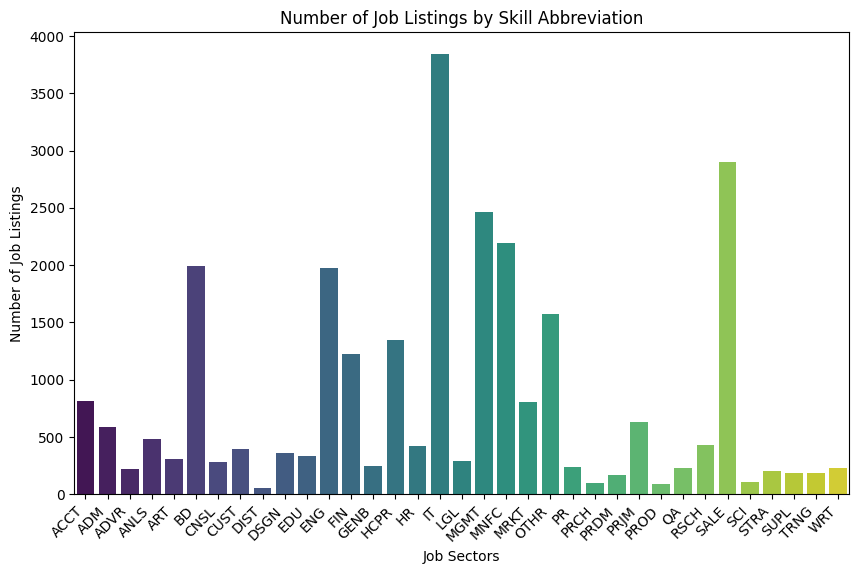

In [17]:
#EDA over the job skills dataset

#list of all job skills
unique_skills = job_skills['skill_abr'].unique().tolist()
print(unique_skills)

#map to store the number of openings for each skill
job_freq = job_skills.groupby('skill_abr').size().to_dict()
#print(job_freq)

mapping_df = pd.DataFrame(list(job_freq.items()), columns=['skill_abr', 'count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='skill_abr', y='count', data=mapping_df, palette='viridis')
plt.title('Number of Job Listings by Skill Abbreviation')
plt.xlabel('Job Sectors')
plt.ylabel('Number of Job Listings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

In [21]:
job_skills

,job_id,skill_abr
0,3690843087,ACCT
1,3690843087,FIN
2,3691763971,MGMT
3,3691763971,MNFC
4,3691775263,MGMT
...,...,...
27894,3701373522,ADM
27895,3701373523,HCPR
27896,3701373524,OTHR
27897,3701373527,BD


#Benefits

In [18]:
benefits

,job_id,inferred,type
0,3690843087,0,Medical insurance
1,3690843087,0,Dental insurance
2,3690843087,0,401(k)
3,3690843087,0,Paid maternity leave
4,3690843087,0,Disability insurance
...,...,...,...
13756,3701373527,0,Medical insurance
13757,3701373527,0,Vision insurance
13758,3701373527,0,Dental insurance
13759,3701373527,0,401(k)


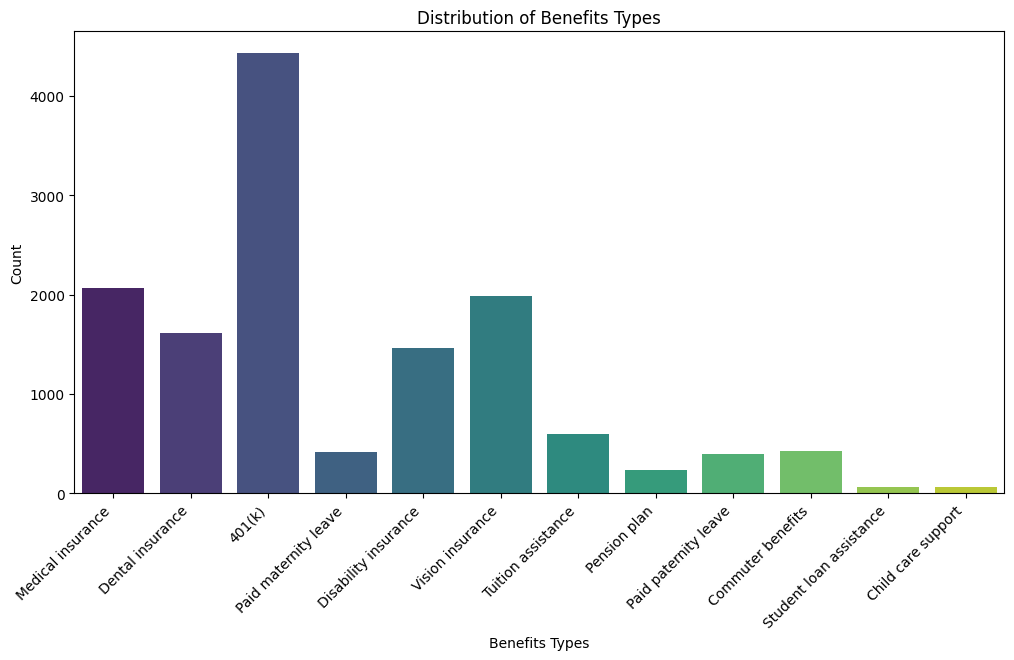

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='type', data=benefits, palette='viridis')
plt.title('Distribution of Benefits Types')
plt.xlabel('Benefits Types')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Companies

In [31]:
from google.colab import data_table
data_table.DataTable(companies)


Output hidden; open in https://colab.research.google.com to view.

companies_industries

In [26]:
from google.colab import data_table
data_table.DataTable(companies_industries)

Output hidden; open in https://colab.research.google.com to view.

# companies_specialities

In [66]:
from google.colab import data_table
data_table.DataTable(companies_specialities)
# Plot the number of companies for the top specializations
#print(companies_specialities.columns)


Output hidden; open in https://colab.research.google.com to view.

# Employee Counts

In [76]:
employee_counts.columns
selected_company_df = employee_counts[employee_counts['company_id'] == 206587]
print(selected_company_df)

Empty DataFrame
Columns: [company_id, employee_count, follower_count, time_recorded]
Index: []


###Relationship between company speiciality and employee count

In [73]:
merged_df = pd.merge(employee_counts, companies_specialities, on='company_id')
print(merged_df)
# Calculate the average number of employees for each specialization
avg_employees_by_specialization = merged_df.groupby('speciality')['employee_count'].mean().reset_index()
print(avg_employees_by_specialization)

Empty DataFrame
Columns: [company_id, employee_count, follower_count, time_recorded, speciality]
Index: []
Empty DataFrame
Columns: [speciality, employee_count]
Index: []
